## Imports

In [1]:
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Initialize a dictionary to store performance metrics for two approaches: CAMED and NoCEP.
- Each key represents a metric (CPU, memory, F1-score, accuracy, precision, specificity, recall, false positives) for a specific approach, and its value is an empty list to store data points.

In [2]:

data = {'cpu_CAMED': [], 'cpu_NoCEP': [], 'memory_CAMED': [], 'memory_NoCEP': [], 
        'f1-score_CAMED': [], 'accuracy_CAMED': [], 'precision_CAMED': [], 'specificity_CAMED': [], 'recall_CAMED': [], 'fp_CAMED': [],
        'f1-score_NoCEP': [], 'accuracy_NoCEP': [], 'precision_NoCEP': [], 'specificity_NoCEP': [], 'recall_NoCEP': [], 'fp_NoCEP': []}

## Loading Memory and CPU Metrics
- This section iterates through 30 different runs (from 1 to 30) and two approaches ('NoCEP', 'CAMED') to load and process CPU and memory usage data.

In [3]:
for i in range(1, 31): 
    for approach in ['NoCEP', 'CAMED']:
        cpu_data = pd.read_csv(approach+'/'+str(i)+'.cpu_overall.csv')
        memory_data = pd.read_csv(approach+'/'+str(i)+'.memory_data.csv')
        
        cpu_data['user+sys'] = cpu_data['User%'] + cpu_data['Sys%'] 
        
        data['cpu_'+approach].append(cpu_data['user+sys'].mean()) 
        data['memory_'+approach].append(memory_data['active'].mean())

## Loading Approach Accuracy Metrics
- This section also iterates through the same 30 runs and two approaches to load and process model output data for calculating various accuracy-related metrics.

In [4]:
       
for i in range(1, 31):  
    for approach in ['NoCEP', 'CAMED']:
        output = pd.read_csv(approach+'/'+str(i)+'.model_output.csv')
    
        if approach == "NoCEP":
            output.columns = ['tcp_time', 'srcAddr', 'dstAddr', 'mqtt_type', 'mqtt_length', 'mqtt_passwd', 'model_pred', 'is_attack']
        else:
            output.columns = ['tcp_time', 'srcAddr', 'dstAddr', 'mqtt_type', 'mqtt_length', 'mqtt_passwd', 'length', 'model_pred', 'is_attack']
            
        data['f1-score_'+approach].append(f1_score(output['model_pred'],  output['is_attack']))
        data['accuracy_'+approach].append(accuracy_score(output['model_pred'], output['is_attack']))
        data['precision_'+approach].append(precision_score(output['model_pred'], output['is_attack'], average='macro'))
        data['recall_'+approach].append(recall_score(output['model_pred'],  output['is_attack']))
        
        cm = confusion_matrix(output['is_attack'], output['model_pred'])
        tn, fp, fn, tp = cm.ravel()
        data['fp_'+approach].append(fp)
        data['specificity_'+approach].append((tn/(tn+fp)))

### Calculate and Print Metrics for CAMED Approach

In [48]:
approach = 'CAMED' # Set the current approach to 'CAMED' for subsequent calculations and printing.

print(approach)

mean_cpu_cep = sum(data['cpu_'+approach])/len(data['cpu_'+approach])
mean_memory_cep=sum(data['memory_'+approach])/len(data['memory_'+approach])
mean_precision_cep=sum(data['precision_'+approach])/len(data['precision_'+approach])
mean_f1score_cep=sum(data['f1-score_'+approach])/len(data['f1-score_'+approach])
mean_specificity_cep=sum(data['specificity_'+approach])/len(data['specificity_'+approach])
mean_recall_cep=sum(data['recall_'+approach])/len(data['recall_'+approach])
mean_accuracy_cep=sum(data['accuracy_'+approach])/len(data['accuracy_'+approach])
mean_fp_cep=sum(data['fp_'+approach])/len( data['fp_'+approach])

std_cpu_cep = np.std(data['cpu_'+approach])
std_memory_cep=np.std(data['memory_'+approach])
std_precision_cep=np.std(data['precision_'+approach])
std_f1score_cep=np.std(data['f1-score_'+approach])
std_specificity_cep=np.std(data['specificity_'+approach])
std_recall_cep=np.std(data['recall_'+approach])
std_accuracy_cep=np.std(data['accuracy_'+approach])
std_fp_cep=np.std(data['fp_'+approach])


print(f'Metric: Mean - STD')
print(f'CPU Usage: {mean_cpu_cep:.2f} - {std_cpu_cep:.2f}')
print(f'Memory Usage : {mean_memory_cep/1024:.2f} - {std_memory_cep/1024:.2f}')
print(f'F1 Score: {mean_f1score_cep:.2f} - {std_f1score_cep:.2f}')
print(f'Precision: {mean_precision_cep:.2f} - {std_precision_cep:.2f}')
print(f'Recall: {mean_recall_cep:.2f} - {std_recall_cep:.2f}')
print(f'Accuracy: {mean_accuracy_cep:.2f} - {std_accuracy_cep:.2f}')
print(f'Specificity: {mean_specificity_cep:.2f} - {std_specificity_cep:.2f}')
print(f'False Positives: {mean_fp_cep:.2f} - {std_fp_cep:.2f}')

CAMED
Metric: Mean - STD
CPU Usage: 87.80 - 0.36
Memory Usage : 4.22 - 0.05
F1 Score: 0.99 - 0.00
Precision: 0.96 - 0.01
Recall: 0.99 - 0.00
Accuracy: 0.99 - 0.00
Specificity: 0.92 - 0.02
False Positives: 40.33 - 14.01


### Calculate and Print Metrics for NoCEP Approach

In [49]:
approach = 'NoCEP' # Set the current approach to 'NoCEP' for subsequent calculations and printing.

print('\n'+approach)

mean_cpu_NoCEP = sum(data['cpu_'+approach])/len(data['cpu_'+approach])
mean_memory_NoCEP=sum(data['memory_'+approach])/len(data['memory_'+approach])
mean_f1score_NoCEP=sum(data['f1-score_'+approach])/len(data['f1-score_'+approach])
mean_precision_NoCEP=sum(data['precision_'+approach])/len(data['precision_'+approach])
mean_recall_NoCEP=sum(data['recall_'+approach])/len(data['recall_'+approach])
mean_accuracy_NoCEP=sum(data['accuracy_'+approach])/len(data['accuracy_'+approach])
mean_specificity_NoCEP=sum(data['specificity_'+approach])/len(data['specificity_'+approach])
mean_fp_NoCEP=sum(data['fp_'+approach])/len( data['fp_'+approach])

std_cpu_NoCEP = np.std(data['cpu_'+approach])
std_memory_NoCEP=np.std(data['memory_'+approach])
std_f1score_NoCEP=np.std(data['f1-score_'+approach])
std_precision_NoCEP=np.std(data['precision_'+approach])
std_recall_NoCEP=np.std(data['recall_'+approach])
std_accuracy_NoCEP=np.std(data['accuracy_'+approach])
std_specificity_NoCEP=np.std(data['specificity_'+approach])
std_fp_NoCEP=np.std(data['fp_'+approach])

print(f'Metric: Mean - STD')
print(f'CPU Usage: {mean_cpu_NoCEP:.2f} - {std_cpu_NoCEP:.2f}')
print(f'Memory Usage : {mean_memory_NoCEP/1024:.2f} - {std_memory_NoCEP/1024:.2f}')
print(f'F1 Score: {mean_f1score_NoCEP:.2f} - {std_f1score_NoCEP:.2f}')
print(f'Precision: {mean_precision_NoCEP:.2f} - {std_precision_NoCEP:.2f}')
print(f'Recall: {mean_recall_NoCEP:.2f} - {std_recall_NoCEP:.2f}')
print(f'Accuracy: {mean_accuracy_NoCEP:.2f} - {std_accuracy_NoCEP:.2f}')
print(f'Specificity: {mean_specificity_NoCEP:.2f} - {std_specificity_NoCEP:.2f}')
print(f'False Positives: {mean_fp_NoCEP:.2f} - {std_fp_NoCEP:.2f}')


NoCEP
Metric: Mean - STD
CPU Usage: 93.48 - 1.62
Memory Usage : 4.00 - 0.10
F1 Score: 0.98 - 0.01
Precision: 0.92 - 0.02
Recall: 0.95 - 0.02
Accuracy: 0.96 - 0.01
Specificity: 0.84 - 0.04
False Positives: 218.33 - 100.64


## Print Comparison Summary (CAMED vs. NoCEP)
- This section calculates and prints the difference or percentage difference between the CAMED and NoCEP approaches for each metric.

In [195]:
print('\nResumo CEP vs NoCEP')

print(f'CPU Usage:         {mean_cpu_NoCEP:.2f} ({std_cpu_NoCEP:.2f})   |   {mean_cpu_cep:.3f} ({std_cpu_cep:.2f}) |   {mean_cpu_cep - mean_cpu_NoCEP:.2f}%')
print(f'Memory Usage:      {mean_memory_NoCEP/1024:.3f} ({std_memory_NoCEP/1024:.2f})   |    {mean_memory_cep/1024:.3f} ({std_memory_cep/1024:.2f}) |   +{((-1*(mean_memory_NoCEP-mean_memory_cep)/mean_memory_NoCEP)*100):.2f}%')
print(f'F1 Score:          {mean_f1score_NoCEP:.3f} ({std_f1score_NoCEP:.2f})   |    {mean_f1score_cep:.3f} ({std_f1score_cep:.2f}) |   +{((-1*(mean_f1score_NoCEP-mean_f1score_cep)/mean_f1score_NoCEP)*100):.2f}%')
print(f'Precision:         {mean_precision_NoCEP:.3f} ({std_precision_NoCEP:.2f})   |    {mean_precision_cep:.3f} ({std_precision_cep:.2f}) |   +{((-1*(mean_precision_NoCEP-mean_precision_cep)/mean_precision_NoCEP)*100):.2f}%')
print(f'Recall:            {mean_recall_NoCEP:.3f} ({std_recall_NoCEP:.2f})   |    {mean_recall_cep:.3f} ({std_recall_cep:.2f}) |   +{((-1*(mean_recall_NoCEP-mean_recall_cep)/mean_recall_NoCEP)*100):.2f}%')
print(f'Accuracy:          {mean_accuracy_NoCEP:.3f} ({std_accuracy_NoCEP:.2f})   |    {mean_accuracy_cep:.3f} ({std_accuracy_cep:.2f}) |   +{((-1*(mean_accuracy_NoCEP-mean_accuracy_cep)/mean_accuracy_NoCEP)*100):.2f}%')
print(f'Specificity:       {mean_specificity_NoCEP:.3f} ({std_specificity_NoCEP:.2f})   |    {mean_specificity_cep:.3f} ({std_specificity_cep:.2f}) |   +{((-1*(mean_specificity_NoCEP-mean_specificity_cep)/mean_specificity_NoCEP)*100):.2f}%')
print(f'False Positives: {mean_fp_NoCEP:.3f} ({std_fp_NoCEP:.2f}) |   {mean_fp_cep:.3f} ({std_fp_cep:.2f})|  -{(((mean_fp_NoCEP-mean_fp_cep)/mean_fp_NoCEP)*100):.2f}%')


Resumo CEP vs NoCEP
CPU Usage:         93.48 (1.62)   |   87.800 (0.36) |   -5.68%
Memory Usage:      3.999 (0.10)   |    4.224 (0.05) |   +5.63%
F1 Score:          0.976 (0.01)   |    0.993 (0.00) |   +1.78%
Precision:         0.920 (0.02)   |    0.958 (0.01) |   +4.13%
Recall:            0.953 (0.02)   |    0.987 (0.00) |   +3.52%
Accuracy:          0.962 (0.01)   |    0.989 (0.00) |   +2.71%
Specificity:       0.840 (0.04)   |    0.916 (0.02) |   +9.05%
False Positives: 218.333 (100.64) |   40.333 (14.01)|  -81.53%


## Plotting CPU and Memory Usage

- Create a figure and a 1x2 grid of subplots (one row, two columns).
- The figsize=(15, 5) argument sets the overall size of the figure.
- 'fig' represents the entire figure.
-'axes' is an array containing the individual subplot objects (axes[0] for the left, axes[1] for the right).
- fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

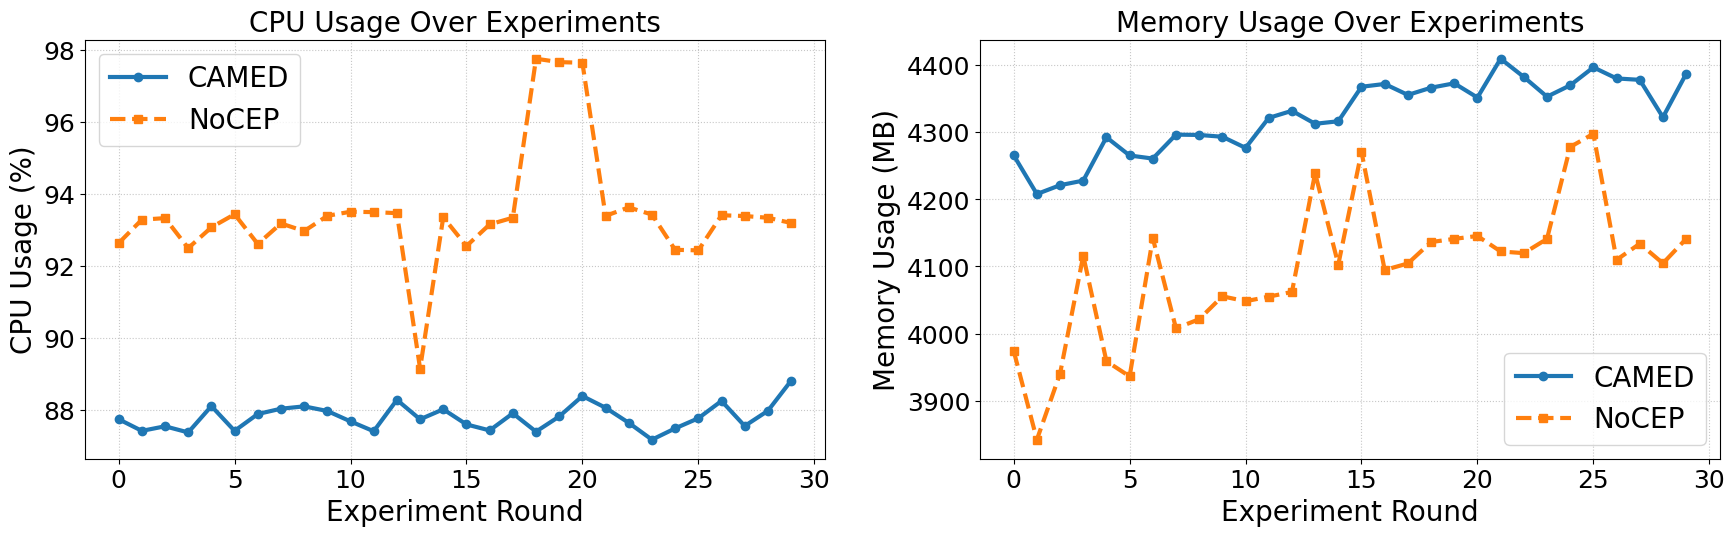

In [233]:
import matplotlib.pyplot as plt

# Assuming 'data' is your pandas DataFrame or similar structure
# with 'cpu_CAMED', 'cpu_NoCEP', 'memory_CAMED', 'memory_NoCEP' columns

# 1. Basic 2x2 grid of subplots (changed to 1 row, 2 columns as per original code)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6)) # Increased figure size for better readability

# --- CPU Usage Plot ---
axes[0].plot(data['cpu_CAMED'], color='#1f77b4', linestyle='-', marker='o', linewidth=3, label='CAMED') # Distinct blue, solid, thicker
axes[0].plot(data['cpu_NoCEP'], color='#ff7f0e', linestyle='--', marker='s', linewidth=3, label='NoCEP') # Distinct orange, dashed, thicker
axes[0].set_title('CPU Usage Over Experiments', fontsize=20) # More descriptive title, larger font
axes[0].set_xlabel('Experiment Round', fontsize=20) # More descriptive x-label
axes[0].set_ylabel('CPU Usage (%)', fontsize=20)
axes[0].grid(True, linestyle=':', alpha=0.7) # Add light grid for easier value reading
axes[0].legend(loc='upper left', fontsize=20) # Place legend strategically
axes[0].tick_params(axis='x', labelsize=18) 
axes[0].tick_params(axis='y', labelsize=18) 

# --- Memory Usage Plot ---
axes[1].plot(data['memory_CAMED'], color='#1f77b4', linestyle='-', marker='o', linewidth=3, label='CAMED') # Consistent colors/styles
axes[1].plot(data['memory_NoCEP'], color='#ff7f0e', linestyle='--', marker='s', linewidth=3, label='NoCEP')
axes[1].set_title('Memory Usage Over Experiments', fontsize=20) # More descriptive title, larger font
axes[1].set_xlabel('Experiment Round', fontsize=20) # More descriptive x-label
axes[1].set_ylabel('Memory Usage (MB)', fontsize=20) # Corrected (MBs to MB)
axes[1].grid(True, linestyle=':', alpha=0.7) # Add light grid
axes[1].legend(loc='lower right', fontsize=20) # Place legend strategically
axes[1].tick_params(axis='x', labelsize=18) 
axes[1].tick_params(axis='y', labelsize=18) 

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout(pad=3.0) # Added padding for better spacing
plt.savefig('resources_metrics.png', dpi=1200, bbox_inches='tight') # High resolution save, tightly crop whitespace
plt.show()

## Plotting Model metrics

- Create a figure and a 2x2 grid of subplots (two row, two columns).
- The figsize=(12, 7) argument sets the overall size of the figure.
- 'fig' represents the entire figure.
-'axes' is an array containing the individual subplot objects (axes[0] for the left, axes[1] for the right).

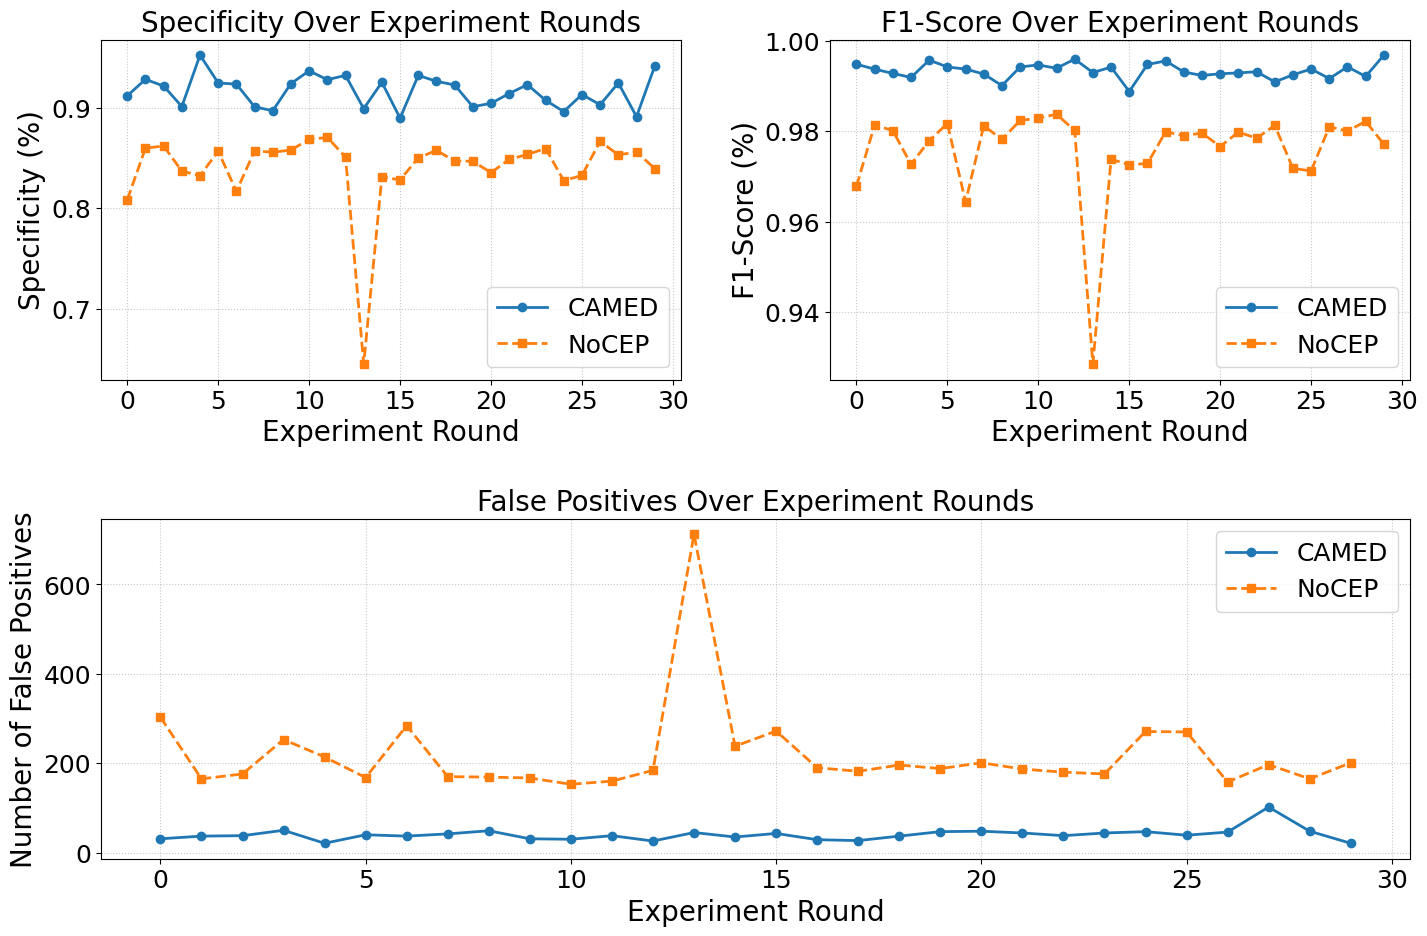

In [235]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy for arange

# Assuming 'data' is your pandas DataFrame or similar structure
# with 'specificity_CAMED', 'specificity_NoCEP', 'f1-score_CAMED', 'f1-score_NoCEP',
# 'fp_CAMED', 'fp_NoCEP' columns

num_experiments = 31 # Get the total number of experiment rounds
tick_interval = 5 # Set interval for x-ticks, e.g., show every 5th experiment
ticks = np.arange(0, num_experiments, tick_interval)

# Create the figure for the subplots
# Note: When using plt.subplot(xyz), you don't define fig, axes = plt.subplots(...) initially
# The figsize applies to the entire figure containing all subplots.
plt.figure(figsize=(15, 10)) # Adjust figure size for better overall layout for 3 plots

# --- Specificity plot (Top-Left) ---
ax1 = plt.subplot(221) # 2 rows, 2 columns, 1st subplot
ax1.plot(data['specificity_CAMED'], color='#1f77b4', linestyle='-', linewidth=2,
         marker='o', markersize=6, label='CAMED')
ax1.plot(data['specificity_NoCEP'], color='#ff7f0e', linestyle='--', linewidth=2,
         marker='s', markersize=6, label='NoCEP')
ax1.set_title('Specificity Over Experiment Rounds', fontsize=20)
ax1.set_xlabel('Experiment Round', fontsize=20)
ax1.set_ylabel('Specificity (%)', fontsize=20) # Adjusted label for clarity
ax1.grid(True, linestyle=':', alpha=0.7)
ax1.set_xticks(ticks) # Apply controlled x-ticks
ax1.tick_params(axis='x', labelsize=18) # Set x-tick label font size
ax1.tick_params(axis='y', labelsize=18) # Set x-tick label font size
ax1.legend(loc='lower right', fontsize=18)

# --- F1-score plot (Top-Right) ---
ax2 = plt.subplot(222) # 2 rows, 2 columns, 2nd subplot
ax2.plot(data['f1-score_CAMED'], color='#1f77b4', linestyle='-', linewidth=2,
         marker='o', markersize=6, label='CAMED')
ax2.plot(data['f1-score_NoCEP'], color='#ff7f0e', linestyle='--', linewidth=2,
         marker='s', markersize=6, label='NoCEP')
ax2.set_title('F1-Score Over Experiment Rounds', fontsize=20)
ax2.set_xlabel('Experiment Round', fontsize=20)
ax2.set_ylabel('F1-Score (%)', fontsize=20)
ax2.grid(True, linestyle=':', alpha=0.7)
ax2.set_xticks(ticks) # Apply controlled x-ticks
ax2.tick_params(axis='x', labelsize=18) # Set x-tick label font size
ax2.tick_params(axis='y', labelsize=18) # Set x-tick label font size
ax2.legend(loc='lower right', fontsize=18)

# --- False Positives plot (Bottom - spanning both columns) ---
ax3 = plt.subplot(212) # 2 rows, 1 column, 2nd subplot (takes entire bottom row)
ax3.plot(data['fp_CAMED'], color='#1f77b4', linestyle='-', linewidth=2,
         marker='o', markersize=6, label='CAMED')
ax3.plot(data['fp_NoCEP'], color='#ff7f0e', linestyle='--', linewidth=2,
         marker='s', markersize=6, label='NoCEP')
ax3.set_title('False Positives Over Experiment Rounds', fontsize=20)
ax3.set_xlabel('Experiment Round', fontsize=20)
ax3.set_ylabel('Number of False Positives', fontsize=20)
ax3.grid(True, linestyle=':', alpha=0.7)
ax3.set_xticks(ticks) # Apply controlled x-ticks
ax3.tick_params(axis='x', labelsize=18) # Set x-tick label font size
ax3.tick_params(axis='y', labelsize=18) # Set x-tick label font size
ax3.legend(loc='upper right', fontsize=18)

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout(pad=3.0) # Added padding for better spacing and to accommodate 3 plots
plt.savefig('metrics.png', dpi=300, bbox_inches='tight') # High resolution save, tightly crop whitespace
plt.show()